## Análise exploratória dos dados do ECB

Importe as bibliotecas necessárias

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer

Importe os dados

In [47]:
data = pd.read_csv('all_ECB_speeches.csv',sep = '|',encoding = 'utf-8')
data.head()

,date,speakers,title,subtitle,contents
0,2024-02-26,Christine Lagarde,European Parliament plenary debate on the ECB ...,"Speech by Christine Lagarde, President of the ...",SPEECH European Parliament plenary debate ...
1,2024-02-23,Isabel Schnabel,Has the fight against inflation been won?,"Slides by Isabel Schnabel, Member of the Execu...",NaN
2,2024-02-16,Isabel Schnabel,From laggard to leader? Closing the euro area’...,Inaugural lecture of the EMU Lab by Isabel Sch...,SPEECH From laggard to leader? Closing the ...
3,2024-02-15,Philip R. Lane,The banking channel of monetary policy,"Slides by Philip R. Lane, Member of the Execut...",NaN
4,2024-02-15,Christine Lagarde,Hearing of the Committee on Economic and Monet...,"Speech by Christine Lagarde, President of the ...",SPEECH Hearing of the Committee on Economic...


Cheque a quantidade e a proporção de valores NaN

In [48]:
print("Total de valores nulos por coluna:")
print(data.isnull().sum(),'\n')
print("Proporção de valores nulos por coluna:")
print(data.isnull().sum()/data.shape[0])

Total de valores nulos por coluna:
date         0
speakers     5
title        0
subtitle     1
contents    89
dtype: int64 

Proporção de valores nulos por coluna:
date        0.000000
speakers    0.001804
title       0.000000
subtitle    0.000361
contents    0.032107
dtype: float64


Retire as linhas com NaN nas colunas relevantes, considerando que a proporção é pequena

In [49]:
data = data.dropna(subset=['speakers','contents'])
data = data.reset_index(drop=True)

Converta os tipos de dados

In [50]:
data['date'] = pd.to_datetime(data['date'])
data['speakers'] = data['speakers'].astype(str)
data['title'] = data['title'].astype(str)
data['subtitle'] = data['subtitle'].astype(str)
data['contents'] = data['contents'].astype(str)

# Visualização

Veja o total de tokens por discurso

Token indices sequence length is longer than the specified maximum sequence length for this model (2298 > 512). Running this sequence through the model will result in indexing errors


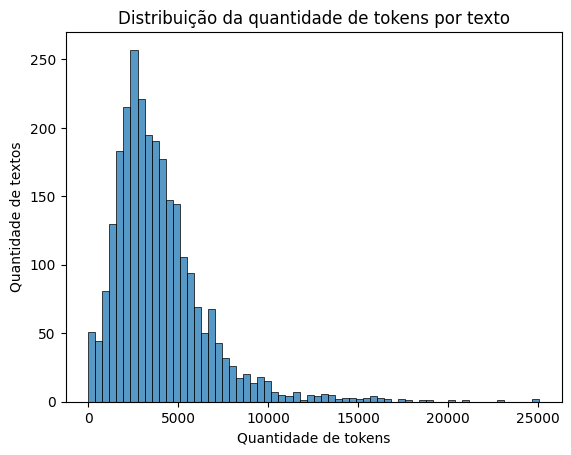

In [59]:
# Tokenize each text and plot the distribution of the number of tokens
tokenizer = BertTokenizer.from_pretrained("ProsusAI/finbert")
data['tokens'] = data['contents'].apply(lambda x: len(tokenizer.encode(x)))
sns.histplot(data['tokens'])
plt.xlabel('Quantidade de tokens')
plt.ylabel('Quantidade de textos')
plt.title('Distribuição da quantidade de tokens por texto')
plt.show()

Quantidade de tokens por sentença

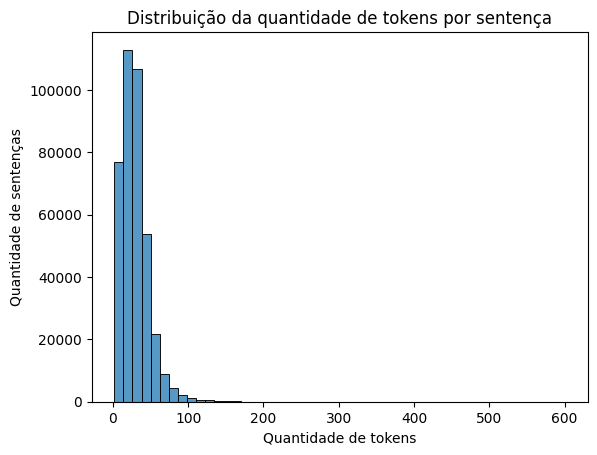

In [64]:
# Novo dataset para as sentenças
sentences = pd.DataFrame(data['contents'])
# Separe as senteças em cada texto com base nos pontos finais
sentences['sentences'] = sentences['contents'].apply(lambda x: x.split('.'))
sentences = sentences.explode('sentences')
sentences = sentences.reset_index(drop=True)
# Separe as sentenças em tokens
sentences['tokens'] = sentences['sentences'].apply(lambda x: len(tokenizer.encode(x)))
sns.histplot(sentences['tokens'], bins=50)
plt.xlabel('Quantidade de tokens')
plt.ylabel('Quantidade de sentenças')
plt.title('Distribuição da quantidade de tokens por sentença')
plt.show()


In [63]:
sentences['tokens'].describe()

count    390623.000000
mean         28.487854
std          18.561231
min           2.000000
25%          16.000000
50%          26.000000
75%          37.000000
max         601.000000
Name: tokens, dtype: float64

In [65]:
# See sentences with more than 512 tokens
sentences[sentences['tokens'] > 512]

,contents,sentences,tokens
215308,Estrategias económicas de salida de la crisi...,Hoy es imperativo: afrontar los riesgos que...,601


Quantidade de discursos por ano

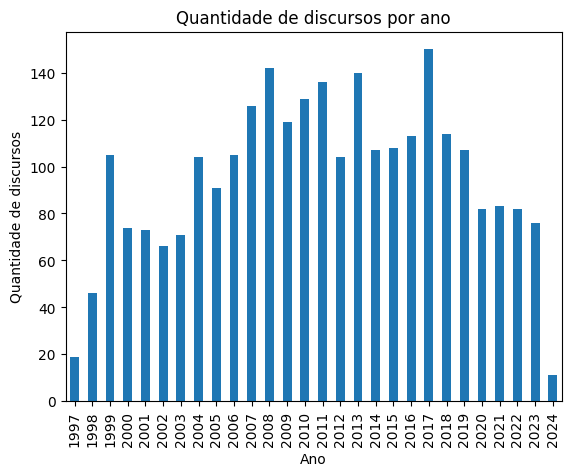

In [54]:
data['year'] = data['date'].dt.year
data['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Quantidade de discursos por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de discursos')
plt.show()

Quantidade de oradores por ano

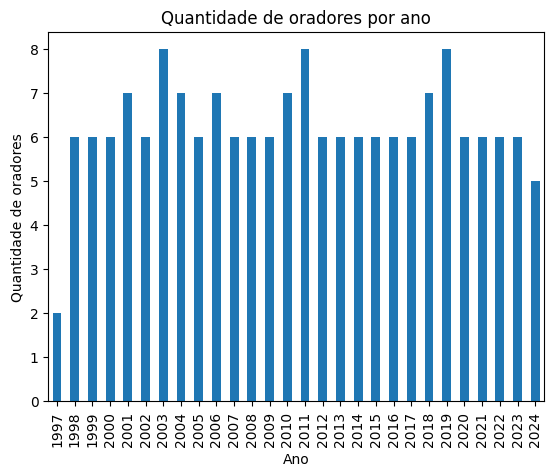

In [55]:
speakers_year = data.groupby('year')['speakers'].nunique()
speakers_year.plot(kind='bar')
plt.title('Quantidade de oradores por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de oradores')
plt.show()

Quantidade de discursos por orador

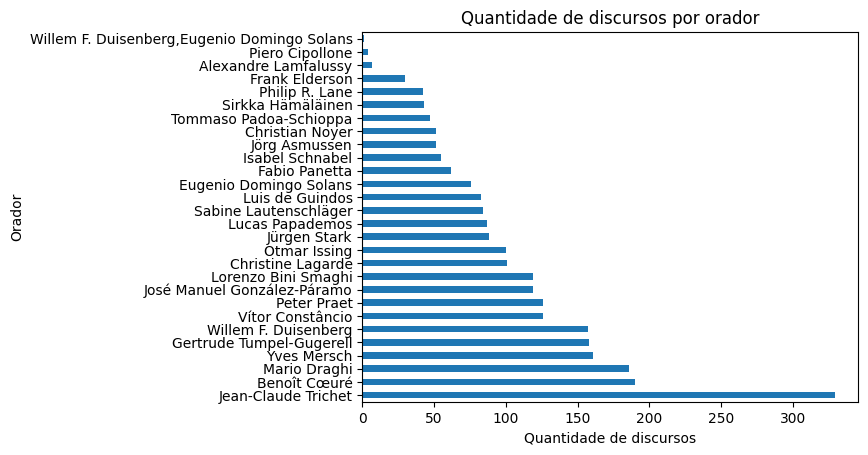

In [56]:
data['speakers'].value_counts().plot(kind='barh')
plt.title('Quantidade de discursos por orador')
plt.xlabel('Quantidade de discursos')
plt.ylabel('Orador')
plt.show()


Destacando os atuais membros do ECB

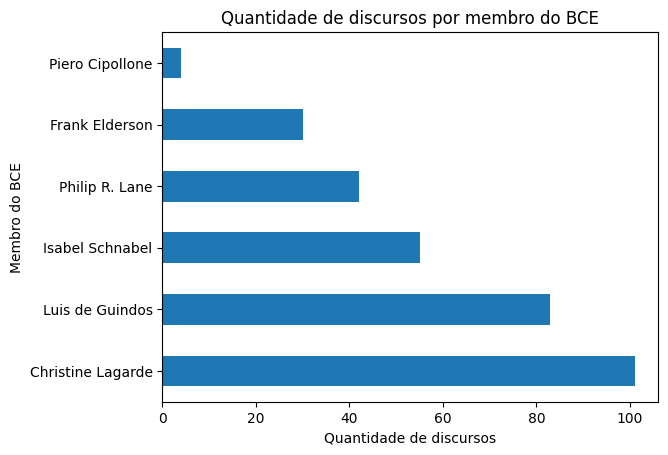

In [57]:
members = ['Christine Lagarde',
           'Luis de Guindos',
           'Piero Cipollone',
           'Frank Elderson',
           'Philip R. Lane',
           'Isabel Schnabel'
]

data['members'] = data['speakers'].apply(lambda x: any(member in x for member in members))
members_data = data[data['members'] == True]
members_data['speakers'].value_counts().plot(kind='barh')
plt.title('Quantidade de discursos por membro do BCE')
plt.xlabel('Quantidade de discursos')
plt.ylabel('Membro do BCE')
plt.show()

Total de discursos dos membros atuais por ano

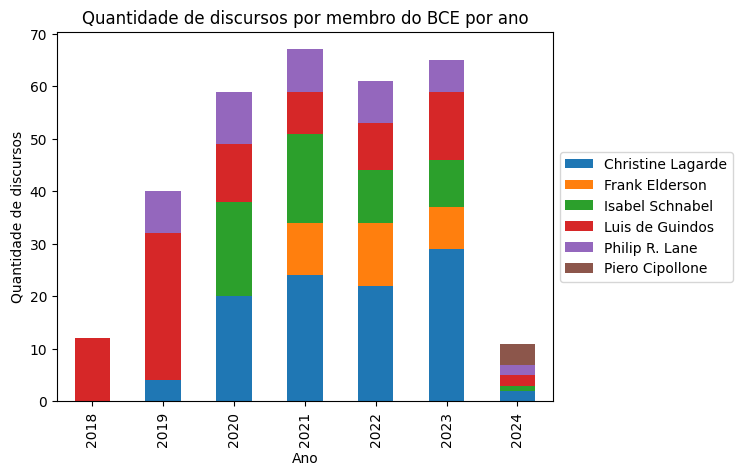

In [58]:
members_data.groupby(['year','speakers']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Quantidade de discursos por membro do BCE por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de discursos')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()